In [47]:


import pandas as pd

data = pd.read_csv("data/loan_dataset.csv")
print(data.head())


   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_ac

   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_ac


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  str    
 2   marital_status        20000 non-null  str    
 3   education_level       20000 non-null  str    
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  str    
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  str    
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  str    
 15  num_of_open_accounts  20000 no

C:\Users\Admin\AppData\Local\Temp\ipykernel_14852\3072576951.py:26: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in X.select_dtypes(include='object'):
c:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproce

Accuracy: 0.86575
              precision    recall  f1-score   support

           0       0.78      0.48      0.60       818
           1       0.88      0.96      0.92      3182

    accuracy                           0.87      4000
   macro avg       0.83      0.72      0.76      4000
weighted avg       0.86      0.87      0.85      4000



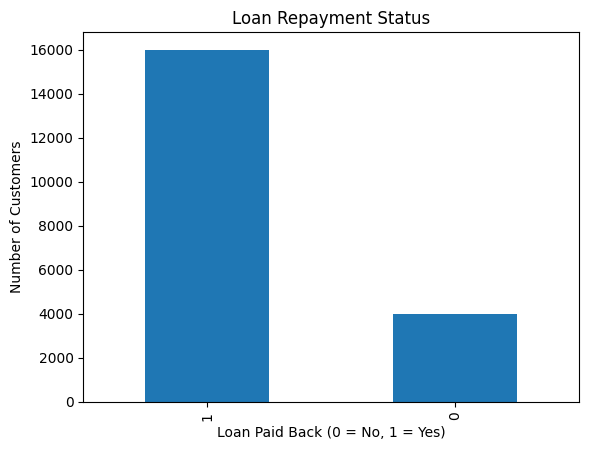

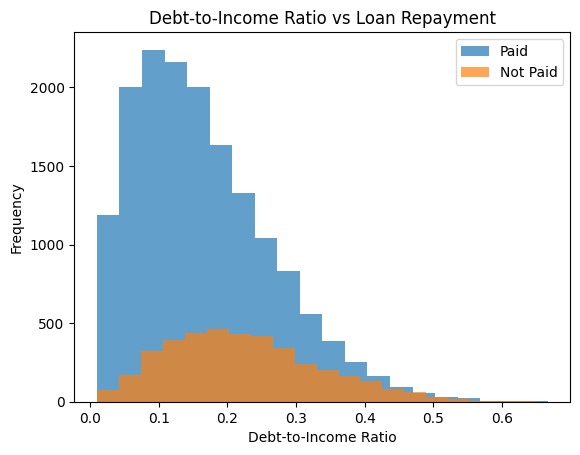

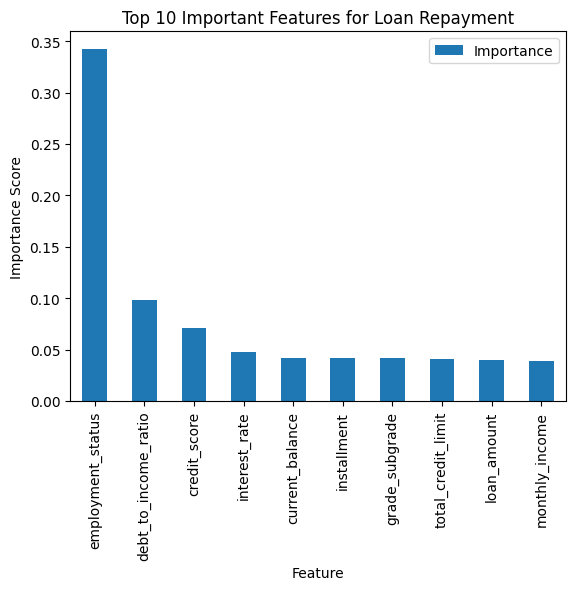

In [48]:


!pip install scikit-learn
import pandas as pd


data = pd.read_csv("data/loan_dataset.csv")
print(data.head())

data.info()
data.columns
data.isnull().sum()

# target column is load paid back

#confirm target column
data['loan_paid_back'].value_counts()

# separate x and y
X = data.drop('loan_paid_back', axis=1)
y = data['loan_paid_back']
print(X.shape, y.shape)

# convert categories into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

# Train - test split (generalization)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Train a second model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# plots


import matplotlib.pyplot as plt

# Count of loan paid vs not paid
data['loan_paid_back'].value_counts().plot(kind='bar')

plt.title('Loan Repayment Status')
plt.xlabel('Loan Paid Back (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

#Debt-to-Income Ratio vs Loan Status
paid = data[data['loan_paid_back'] == 1]['debt_to_income_ratio']
not_paid = data[data['loan_paid_back'] == 0]['debt_to_income_ratio']

plt.hist(paid, bins=20, alpha=0.7, label='Paid')
plt.hist(not_paid, bins=20, alpha=0.7, label='Not Paid')

plt.title('Debt-to-Income Ratio vs Loan Repayment')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#random forest plot
importance = rf.feature_importances_
features = X.columns

import pandas as pd
import matplotlib.pyplot as plt

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).head(10)

imp_df.plot(kind='bar', x='Feature', y='Importance')
plt.title('Top 10 Important Features for Loan Repayment')
plt.ylabel('Importance Score')
plt.show()

